In [2]:
import numpy as np
import pandas as pd

In [53]:
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [54]:
iris = datasets.load_iris()
iris.data.shape


(150, 4)

In [18]:
X = iris['data'][:,(2,3)]
y = iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
# 三个分类，只是获取2个分类
setosa_or_versicolor = (y==0)|(y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf  = svm.SVC(kernel='linear',C=float('inf'))
svm_clf.fit(X,y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
# 一般的模型
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5


def plot_svc_decision_boundary(svm_clf, xmin, xmax,sv=True):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = - w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    if sv:
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
    plt.plot(x0,decision_boundary,'r-',linewidth=2)
    plt.plot(x0,gutter_up,'r--',linewidth=2)
    plt.plot(x0,gutter_down,'r--',linewidth=2)

AttributeError: 'Pipeline' object has no attribute 'coef_'

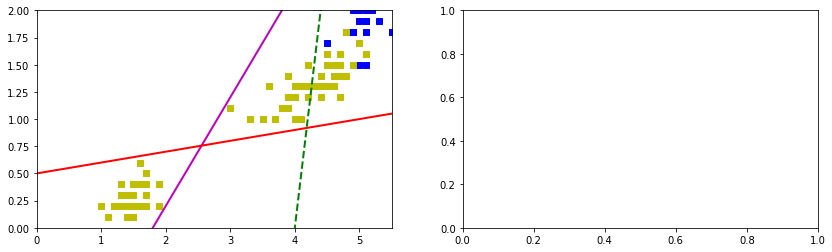

In [52]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.plot(x0,pred_1,'g--',linewidth=2)
plt.plot(x0,pred_2,'m-',linewidth=2)
plt.plot(x0,pred_3,'r-',linewidth=2)
plt.axis([0,5.5,0,2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.axis([0,5.5,0,2])


In [30]:
import numpy as np
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris=datasets.load_iris()
X = iris["data"][:,(2,3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Viginica

# 当我们执行 pipe.fit(X_train, y_train)时，首先由StandardScaler在训练集上执行 fit和transform方法，
# transformed后的数据又被传递给Pipeline对象的下一步，也即PCA()。和StandardScaler一样，
# PCA也是执行fit和transform方法，最终将转换后的数据传递给 LinearSVC。

svm_clf = Pipeline((
    ('std',StandardScaler()),
    ('linear_svc',svm.LinearSVC(C=1))
))   
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

[0.86508935 2.24726149]
[1.72273715 3.20298118]


c:\mypython\miniweb\miniwebserver\mlearn_02\venv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(4, 6, 0.8, 2.8)

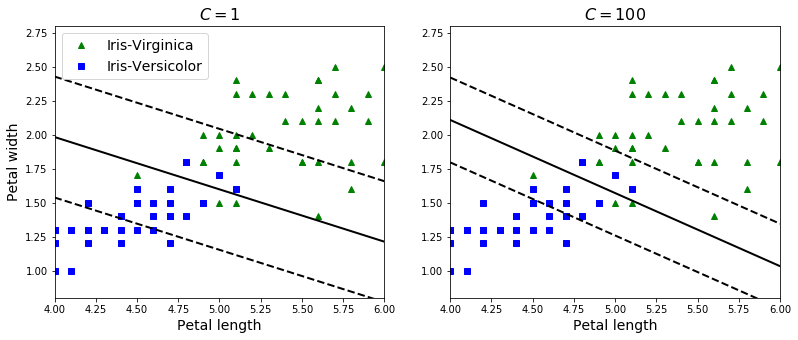

In [57]:
scaler = StandardScaler()
svm_clf1 = svm.LinearSVC(C=1,random_state = 42)
svm_clf2 = svm.LinearSVC(C=100,random_state = 42)


scaled_svm_clf1 = Pipeline((
    ('std',scaler),
    ('linear_svc',svm_clf1)
))  

scaled_svm_clf2 = Pipeline((
    ('std',scaler),
    ('linear_svc',svm_clf2)
)) 
scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)

b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

plt.figure(figsize=(13,5))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6,sv=False)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis((4, 6, 0.8, 2.8))

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6,sv=False)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis((4, 6, 0.8, 2.8))

- 在右侧，使用较高的C值，分类器会减少误分类，但最终会有较小间隔。
- 在左侧，使用较低的C值，间隔要大得多，但很多实例最终会出现在间隔之内。

## 非线性支持向量机